# APPM X720 Biweekly Report

### *Alexey Yermakov*
### *February 29 2022*


# Summary

For this report, I explore the CoNLL-2003 dataset as well as the Named Entity Recognition model which uses the CoNLL-2003 dataset for training.

# Main Content

### **CoNLL-2003 Dataset**

For this report, I wanted to explore the CoNLL-2003 dataset, introduced to us in class for training Natural Language Processing models where each word is assigned a tag. I first read the [paper](https://arxiv.org/pdf/cs/0306050v1.pdf) and gathered my thoughts below.

One of the main goals of the dataset is to help train models which can identify "named entities: persons, locations, organizations, and names of miscellaneous entities that do not belong to the previous three groups" from sentences. The CoNLL-2002 dataset focused on the Spanish and Dutch languages. This dataset, however, focuses on English and German. For each language, "there is a training file, a development file, a test file and a large file with unannotated data". The paper's description of the "development" file makes it seem like it contains validation data, since its purpose is to tune hyperparameters. Furthermore, the paper states that the authors wanted natural language models to utilize the unannotated data in the "learning process". This would explain the purpose of using character embeddings (looking at the character structure of words) in [this paper](https://arxiv.org/pdf/1603.01360.pdf) we covered in class.

#### *Data Collection*

Data was collected from "Reuters new stories between August 1996 and August 1997." The German data was from "the ECI Multilingual Text Corpus", which has many languages, but the German data was collected from the Frankfurter Rundshau newspaper. Below is a table from the paper showing the number of articles sampled, the number of sentences, and the number of words (tokens) for each of the training, development, and test sets for both languages. In this report, I'll focus on the English data.

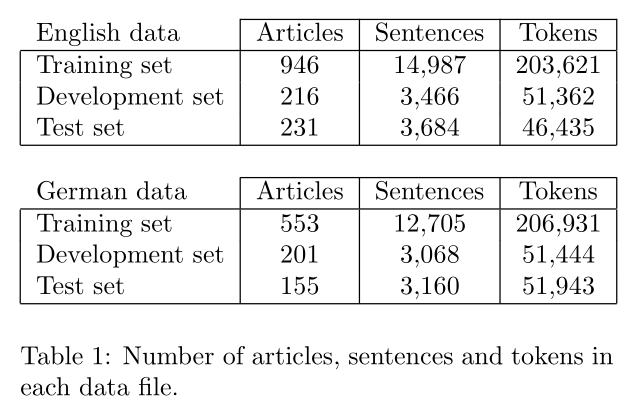

#### *Preprocessing*

The data had the following preprocessing done on it:
- Tokenization (in this case, the [memory-based MBT tagger](https://arxiv.org/pdf/cmp-lg/9607012.pdf)) which aims to assign each word in a corpus to a part of speech (such as verb, adjective, etc.).
- Chunking, which labels parts of speech and phrases (like a noun phrase, such as "the yellow dog"). See [here](https://towardsdatascience.com/chunking-in-nlp-decoded-b4a71b2b4e24) for more info.
- Named entity tagging (this was done by hand), where each word was assigned to one of the four categories mentioned above (persons, locations, organizations, and other).

The resulting data is then stored in the following format, where each sentence's word is a separate line, and each sentence is a separate paragraph in the file.:

```
The DT B-NP O
mutiny NN I-NP O
forced VBN B-VP O
Patasse NNP B-NP B-PER
to TO B-VP O
miss VB I-VP O
the DT B-NP O
summit NN I-NP O
. . O O
```

which is of the following format:

```
<word> <part of speech> <chunk tag> <named entity tag>
```

The following format is used for `<named entity tag>`:
- `O`: Not a named entity
- `B-XXX`: The start of a named entity
- `I-XXX`: Inside of a named entity

where for `XXX` we have:
- `PER`: for persons
- `ORG`: for organizations
- `LOC`: for locations
- `MISC`: for miscellaneous

The paper doesn't mention *where* the `<part of speech>` tags come from, but I found a [website](https://www.ibm.com/docs/en/wca/3.5.0?topic=analytics-part-speech-tag-sets) which seems to have the ones in the dataset:

- `UNKNOWN`: 	Unknown word
- `DT`: 	Determiner
- `QT`: 	Quantifier
- `CD`: 	Cardinal number
- `NN`: 	Noun, singular
- `NNS`: 	Noun, plural
- `NNP`: 	Proper noun, singular
- `NNPS`: 	Proper noun, plural
- `EX`: 	Existential there, such as in the sentence There was a party.
- `PRP`: 	Personal pronoun (PP)
- `PRP$`: 	Possessive pronoun (PP$)
- `POS`: 	Possessive ending
- `RBS`: 	Adverb, superlative
- `RBR`: 	Adverb, comparative
- `RB`: 	Adverb
- `JJS`: 	Adjective, superlative
- `JJR`: 	Adjective, comparative
- `JJ`: 	Adjective
- `MD`: 	Modal
- `VB`: 	Verb, base form
- `VBP`: 	Verb, present tense, other than third person singular
- `VBZ`: 	Verb, present tense, third person singular
- `VBD`: 	Verb, past tense
- `VBN`: 	Verb, past participle
- `VBG`: 	Verb, gerund or present participle
- `WDT`: 	Wh-determiner, such as which in the sentence Which book do you like better
- `WP`: 	Wh-pronoun, such as which and that when they are used as relative pronouns
- `WP$`: 	Possessive wh-pronoun, such as whose
- `WRB`: 	Wh-adverb, such as when in the sentence I like it when you make dinner for me
- `TO`: 	The preposition to
- `IN`: 	Preposition or subordinating conjunction
- `CC`: 	Coordinating conjunction
- `UH`: 	Interjection
- `RP`: 	Particle
- `SYM`: 	Symbol
- `$`: 	Currency sign
- `''`: 	Double or single quotation marks
- `(`: 	Opening parenthesis, bracket, angle bracket, or brace
- `)`: 	Closing parenthesis, bracket, angle bracket, or brace
- `,`: 	Comma
- `.`: 	End of sentence punctuation (. ! ?)
- `:`: 	Mid-sentence punctuation (: ; ... -- -)

Furthermore, I found the [Stanford Log-linear Part-Of-Speech Tagger](https://nlp.stanford.edu/software/tagger.shtml) which appears to be used to do this kind of tokenization. Lastly, I found potential tags for the `<chunk tag>` section from [here](https://towardsdatascience.com/chunking-in-nlp-decoded-b4a71b2b4e24):

- `NP`: Noun Phrase
- `VP`: Verb phrase
- `ADJP`: Adjective phrase
- `ADVP`: Adverb phrase
- `PP`: Prepositional phrase

Only the first of these lists was provided, to find the tags for the chunker and parts of speech I had to do a lot of searching online. Even then, I'm not sure these are complete lists. This seems like an oversight on the writers of the paper, since these last two lists of tags are arguably just as important as input data.

Below is a table from the paper showing the amounts of each named entity in each dataset.

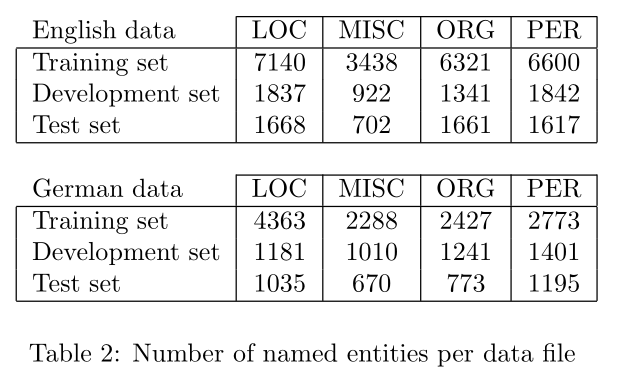

#### *Evaluation*

The formula for evaluation on the dataset is as follows:

$F_{\beta} = \frac{(\beta^2+1)*precision*recall}{(\beta^2)*precision+recall}$

with $\beta = 1$, so:

$F_{\beta=1} = \frac{2*precision*recall}{precision+recall}$

I obtained my understanding for $precision$ and $recall$ from the formulas [here](https://deepai.org/machine-learning-glossary-and-terms/precision-and-recall):

$precision=\frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}$

$recall=\frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$

In this case, a true positive would be a non-`O` named-entity tag that is correctly assigned. Thus, a false positive would be an `O` named-entity tag which is incorrectly assigned a non-`O` named-entity tag. So, $precision$ is the percentage of named-entity tags assigned to words which are correct.

A false negative would be assigning a non-`O` named-entity tag as `O`. So, $recall$ is the percentage of named-entity tags being identified as something which is not `O`.

The formula above, for $F_{\beta=1}$ combines $precision$ and $recall$ into one metric.

#### *EDA*

In this section, I collect some interesting data from the dataset directly. I found a link to [download the dataset](https://data.deepai.org/conll2003.zip) from [Tensorflow's website](https://www.tensorflow.org/datasets/catalog/conll2003).

First, I have my standard imports. We can ignore the GPU error for now, since I don't need it for this report.

In [2]:
# Make sure PyTorch is installed and our GPU is available
import torch
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from collections import OrderedDict
import time
import os

print("GPU Available?",torch.cuda.is_available())
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"

GPU Available? False


Next, I go write a function to collect the relevant information from the dataset. I can collect the following information:

- Number of sentences
- Total number of unique {words, parts of speech, chunk tags, named entity tags}
- Number of occurrences for each {words, parts of speech, chunk tags, named entity tags}

In [8]:
# Directory for the dataset
top_dir = "/home/alexey/Datasets/conll2003/conll2003/"

# Returns a list of vectors and a list of words from the file, as well as the dimension of the vectors
def get_data(file_name):
    # Initialize return variables
    
    # Count the number of times there is a unique value in each column
    words = OrderedDict() # Column 1: Words
    POS = OrderedDict() # Column 2: Parts of speech
    CT = OrderedDict() # Column 3: Chunk tags
    NET = OrderedDict() # Column 4: Named entity tags
    
    # Count sentence lengths
    sentence_flag = False # Check if we encountered at least one word in the sentence
    num_sentences = 0 # Count the total number of sentences
    
    # Open file
    with open(file_name) as f:
        # Read line by line
        lines = f.readlines()
        for i in range(len(lines)):
            line = lines[i]
            line = line.split()
            
            # Check if we just finished a sentence
            if line == [] and sentence_flag == True:
                num_sentences += 1
                sentence_flag = False
                continue
            else:
                sentence_flag = True

            line[0] = line[0].lower() # Make words lowercase

            # Add and/or increment relevant counts
            words[line[0]] = words.get(line[0], 0) + 1
            POS[line[1]] = POS.get(line[1], 0) + 1
            CT[line[2]] = CT.get(line[2], 0) + 1
            NET[line[3]] = NET.get(line[3], 0) + 1

        # Sort dictionaries
        words = OrderedDict(sorted(words.items(), key=lambda x: x[1], reverse=True))
        POS = OrderedDict(sorted(POS.items(), key=lambda x: x[1], reverse=True))
        CT = OrderedDict(sorted(CT.items(), key=lambda x: x[1], reverse=True))
        NET = OrderedDict(sorted(NET.items(), key=lambda x: x[1], reverse=True))

        return words, POS, CT, NET, num_sentences, len(lines)
    raise Exception("get_vecs: File cound not be opened")

print("Number of sentences:", get_data(os.path.join(top_dir, 'test.txt'))[-2])

Number of sentences: 3684


I print the number of sentences to double-check my function. Based on Table 1 above, I should see 3684 sentences, which is exactly what I see! Also, I should mention that I turn each word to lowercase, since I didn't want `JAPAN` and `Japan` to be counted as separate words.

First, I take a look at the amounts of each of {words, parts of speech, chunk tags, named entity tags} in tabular format for each of the three provided files in the dataset: the testing data, training data, and validation data.

In [3]:
for file in ['test.txt', 'train.txt', 'valid.txt']:
    print(f"Data for file {file}:\n")
    # Extract values from files
    words, POS, CT, NET, num_sentences, num_lines = get_data(os.path.join(top_dir, file))
    
    # Number of words from the start and end of the dictionaries
    n = 25
    
    # Make {words, POS, CT, NET} table
    for cur_dict, dict_title in [(words, "Word"), (POS, "Part of Speech"), (CT, "Chunk Tag"), (NET, "Named Entity Tag")]:
        # Create our table data
        dict_tmp = dict()
        dict_tmp[dict_title] = list()
        dict_tmp["Count"] = list()
        dict_len = len(cur_dict)
        for k in cur_dict:
            dict_tmp[dict_title].append(k)
            dict_tmp["Count"].append(cur_dict[k])
        
        # Shrink our output if there are too many items
        if len(dict_tmp[dict_title]) > 2*n:
            dict_tmp[dict_title] = dict_tmp[dict_title][0:n] + ["..."] + dict_tmp[dict_title][-n:]
            dict_tmp["Count"] = dict_tmp["Count"][0:n] + ["..."] + dict_tmp["Count"][-n:]
    
        print(tabulate(dict_tmp, headers="keys", tablefmt="pretty"))
    
    print("\n\n\n\n\n")
    

Data for file test.txt:

+--------------+-------+
|     Word     | Count |
+--------------+-------+
|     the      | 1765  |
|      ,       | 1637  |
|      .       | 1626  |
|      to      |  805  |
|      of      |  789  |
|      in      |  761  |
|      (       |  686  |
|      )       |  684  |
|      a       |  658  |
|     and      |  598  |
|      on      |  467  |
|      "       |  421  |
|     said     |  399  |
|      's      |  347  |
|      -       |  287  |
|     for      |  286  |
|      at      |  251  |
|  -docstart-  |  231  |
|     was      |  224  |
|      4       |  201  |
|     with     |  185  |
|      :       |  184  |
|     from     |  179  |
|      he      |  175  |
|     that     |  175  |
|     ...      |  ...  |
|   peasants   |   1   |
|   packages   |   1   |
|   honorary   |   1   |
|   irishman   |   1   |
|    dublin    |   1   |
|     jack     |   1   |
|   cemented   |   1   |
|    peggy     |   1   |
|  passports   |   1   |
|     dick     |   1   |


So this is sort of difficult to parse, so I'll re-use the same function as above to make the data easier to understand. I don't limit the data to the top and bottom 25 here:

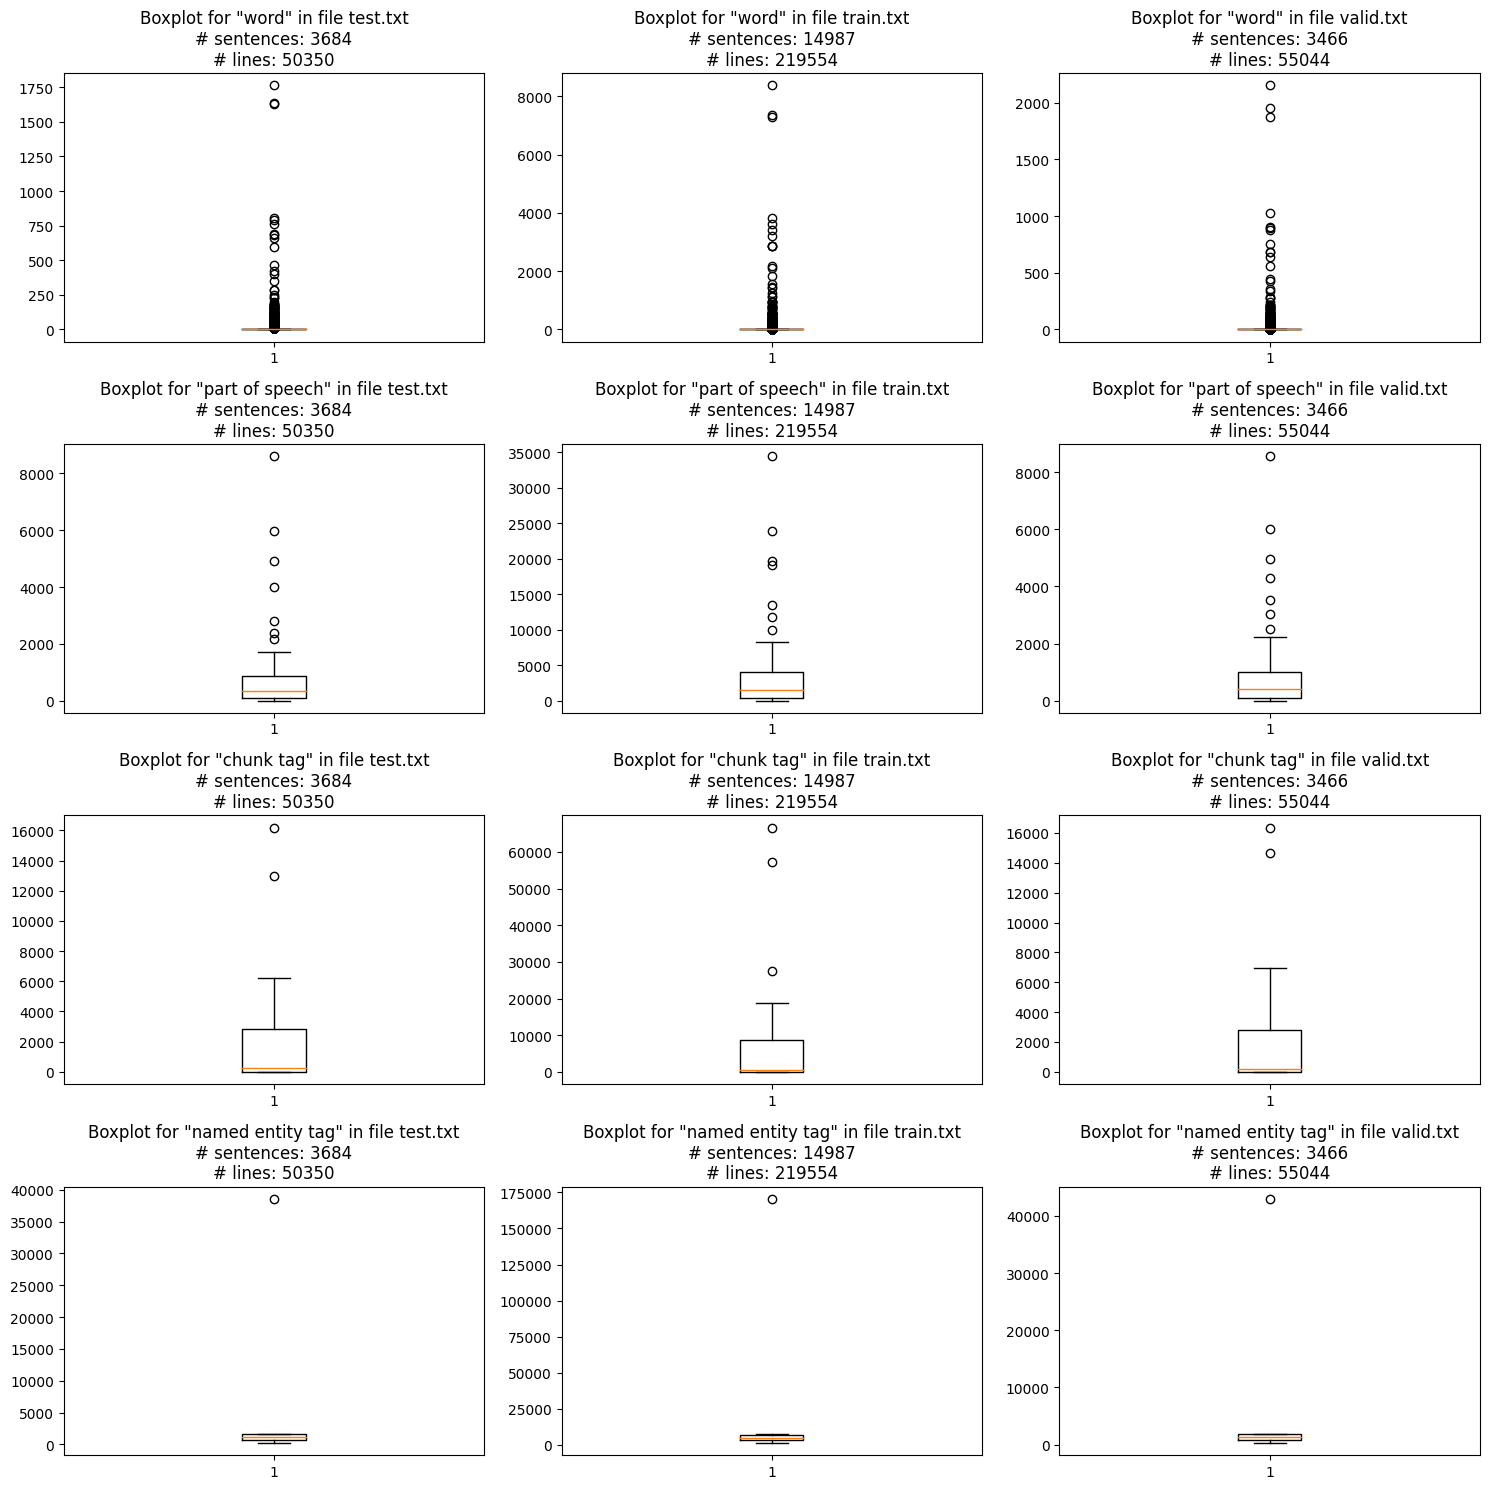

In [6]:
fig, ax = plt.subplots(4, 3, figsize=(15,15))

file_list = ['test.txt', 'train.txt', 'valid.txt']
for i in range(len(file_list)):
    file = file_list[i]
    # Extract values from files
    words, POS, CT, NET, num_sentences, num_lines = get_data(os.path.join(top_dir, file))
    
    # Make {words, POS, CT, NET} table
    helper_list = [(words, "Word"), (POS, "Part of Speech"), (CT, "Chunk Tag"), (NET, "Named Entity Tag")]
    for j in range(len(helper_list)):
        cur_dict, dict_title = helper_list[j]
        # Create our table data
        dict_tmp = dict()
        dict_tmp[dict_title] = list()
        dict_tmp["Count"] = list()
        dict_len = len(cur_dict)
        for k in cur_dict:
            dict_tmp[dict_title].append(k)
            dict_tmp["Count"].append(cur_dict[k])
            
        # Make box and whisker plot
        ax[j, i].boxplot(dict_tmp["Count"])
        ax[j, i].set_title(f"Boxplot for \"{dict_title.lower()}\" in file {file}\n# sentences: {num_sentences}\n# lines: {num_lines}")
fig.tight_layout()

Neat! From the above we can make some interesting conclusions:
- The distributions for every column of data provided in the dataset is extremely skewed towards zero with long tails/outliers.
- The tails for the outliers vary between datasets as well, though this could be explained by the total number of lines in each dataset. For example, the training dataset has larger outliers for every column of data, but it also has many more lines than the other two files: testing and validation data.
- The sizes of the testing and validation dataset are VERY similar, different by only a few tens of sentences and a few hundreds of lines.

Lets visualize this another way, by looking at the histogram of the above data, but limiting it to not include all the items, but the top 30.

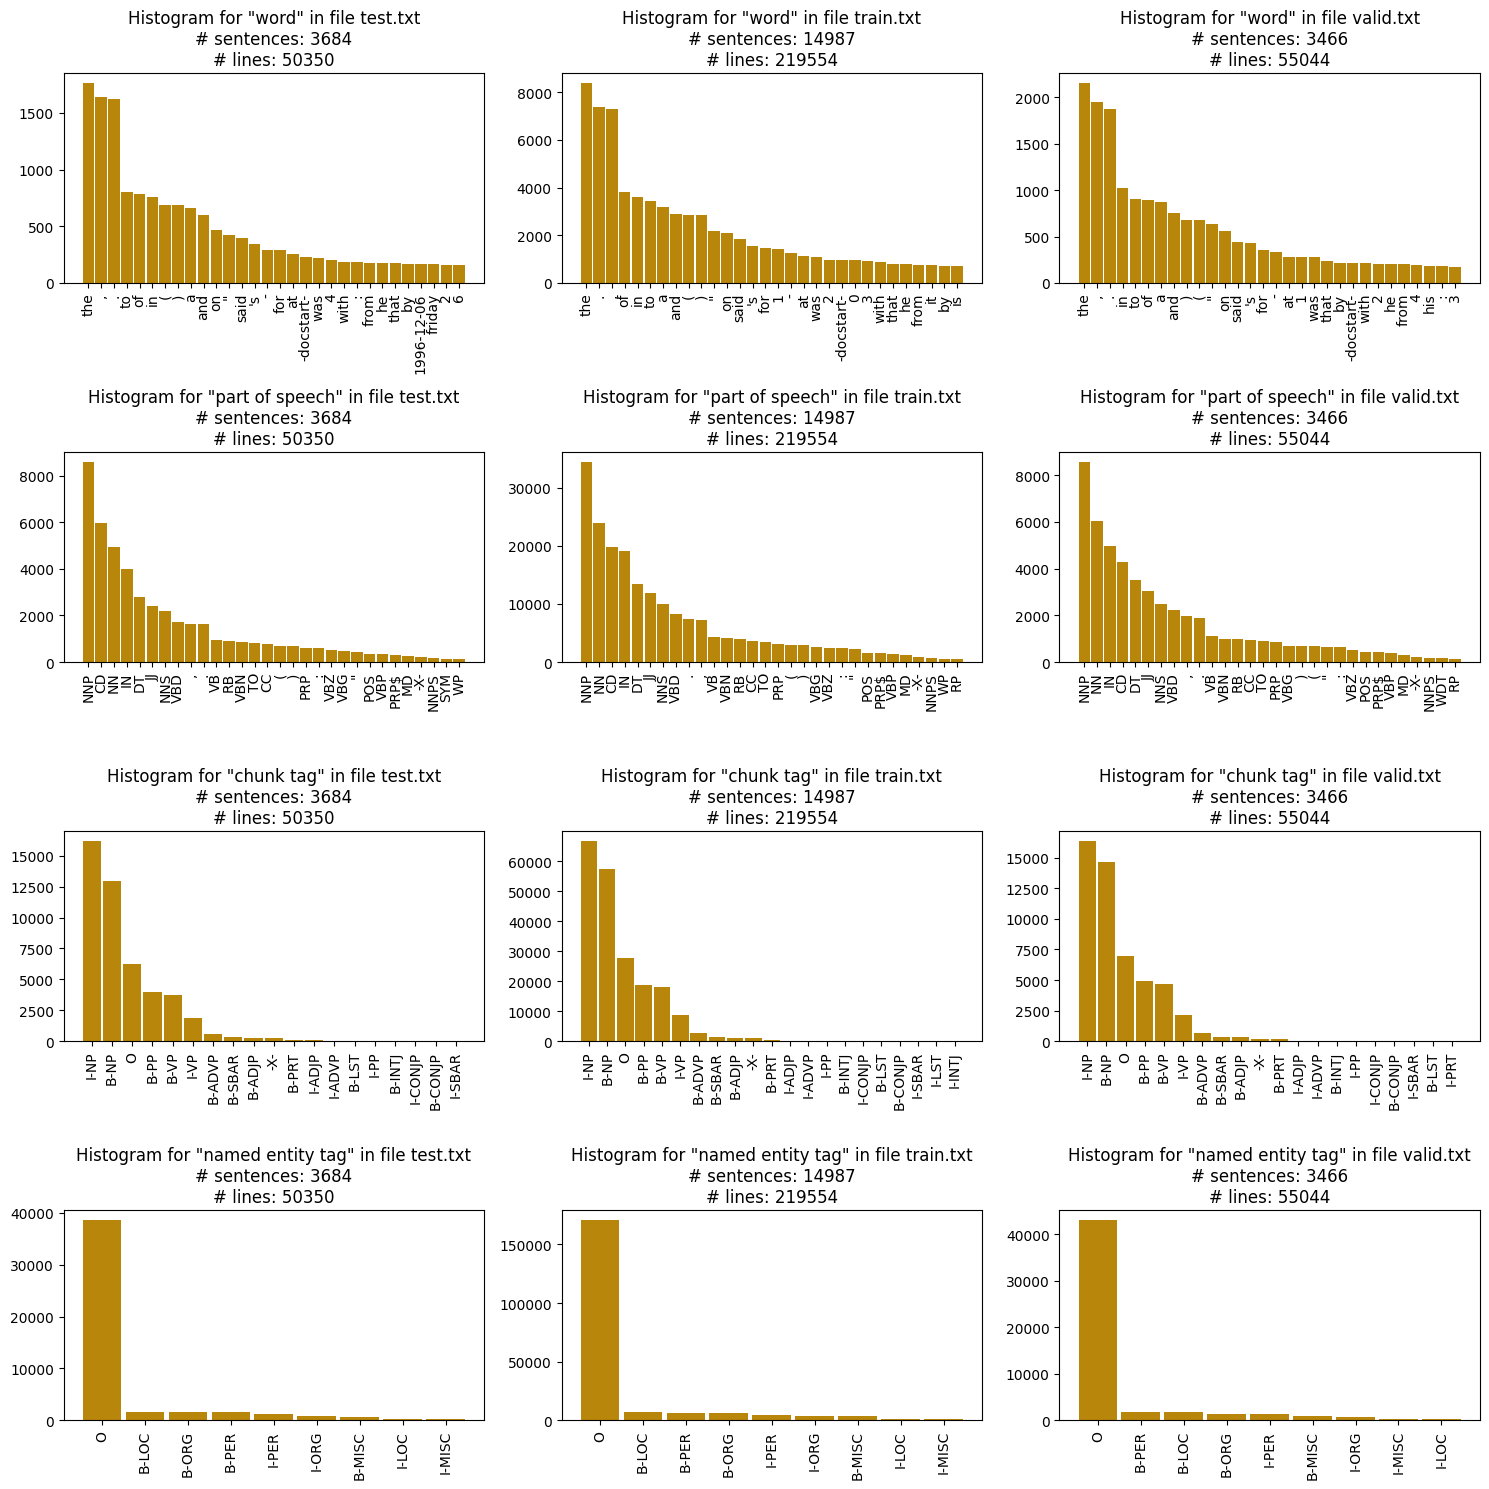

In [26]:
fig, ax = plt.subplots(4, 3, figsize=(15,15))

file_list = ['test.txt', 'train.txt', 'valid.txt']
for i in range(len(file_list)):
    file = file_list[i]
    # Extract values from files
    words, POS, CT, NET, num_sentences, num_lines = get_data(os.path.join(top_dir, file))
    
    # Number of words from the start of the dictionaries
    n_top = 30
    
    # Make {words, POS, CT, NET} table
    helper_list = [(words, "Word"), (POS, "Part of Speech"), (CT, "Chunk Tag"), (NET, "Named Entity Tag")]
    for j in range(len(helper_list)):
        cur_dict, dict_title = helper_list[j]
        # Create our table data
        dict_tmp = dict()
        dict_tmp[dict_title] = list()
        dict_tmp["Count"] = list()
        dict_len = len(cur_dict)
        for k in cur_dict:
            dict_tmp[dict_title].append(k)
            dict_tmp["Count"].append(cur_dict[k])
            
        # Shrink our output if there are too many items
        if len(dict_tmp[dict_title]) > 2*n:
            dict_tmp[dict_title] = dict_tmp[dict_title][0:n_top]
            dict_tmp["Count"] = dict_tmp["Count"][0:n_top]
            
        # Change the naming
        keys = dict_tmp[dict_title]
        values = dict_tmp["Count"]
            
        # Make box and whisker plot
        ax[j, i].bar(range(len(keys)), values, 0.9, color='darkgoldenrod')
        ax[j, i].set_title(f"Histogram for \"{dict_title.lower()}\" in file {file}\n# sentences: {num_sentences}\n# lines: {num_lines}")
        ax[j, i].set_xticks(range(len(keys)), keys, rotation='vertical')
fig.tight_layout()


Beautiful! So, these graphs show that the distribution of the tags are *proportional* in size! Not only that, but the tags are almost identical in location across the datasets. So, we previously saw that the outliers were much larger, which is consistent here, but the rest of the data scales almost identically! This proves to me that the CoNLL-2003 dataset is *really* good for training natural language processing models since each of the three files has similar distributions of words and tags.

### **NER Tagger**

Now that we have an understanding of the dataset, we can play around with neural networks! I'll be looking at the model from the paper ["Neural Architectures for Named Entity Recognition"](https://arxiv.org/pdf/1603.01360.pdf). The code can be found [here](https://github.com/glample/tagger). The paper explains that the model was trained on CoNLL-2002 and CoNLL-2003 for 4 languages, though I'll be focusing on English here.

To set up the model, I ran the following commands to create an [anaconda](anaconda.org/) environment that works with the code provided above:

```
conda create --name NER python=2.7
conda activate NER
conda install numpy
conda install -c conda-forge theano
```

Looking at the files in the [code repo](https://github.com/glample/tagger), it's clear to me that the software is not well commented and the README could be better. I have several questions:

- How exactly was the model trained? `./train.py --train train.txt --dev dev.txt --test test.txt` is the command given, so I assume `train.txt` is the training data, but what is `dev.txt`?
- If I don't want to train the model myself, I have to `tokenize` the input data if I just want to use the named entity recognition tagger; however, what labels does it expect?

I'll explore both of these questions here. Though I'll be copying and pasting my commands and the outputs from a terminal since that's the easiest way to run the model.

First, lets try to run the code. My input file - `test.txt` - contains a single line:


```
John ate a bagel in New York
```

In a terminal, I follow the README's instructions for running the pre-trained model:

```
(NER) [alexey@yyexela tagger]$ python2 tagger.py --model models/english/ --input ../test.txt --output ../output.txt
```

Which results in the output:


```
Loading model...                                                                                                                                                         
Compiling...                                                                                                                                                             
Tagging...                                                                                                                                                               
/home/alexey/.conda/envs/NER/lib/python2.7/site-packages/theano/tensor/subtensor.py:2173: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depr
ecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error
 or a different result.                                                                                                                                                  
  out[0] = inputs[0].__getitem__(inputs[1:])                                                                                                                             
---- 1 lines tagged in 0.8952s ----
```

The output file `output.txt` then contains:

```
John__B-PER ate__O a__O bagel__O in__O New__B-LOC York__I-LOC
```

This is good! The output is what we would expect. The formatting makes sense too, the Named Entity Recognition (NER) tags are just appended to each word after a `__`. This good result makes me question why the README says `The input file should contain one sentence by line, and they have to be tokenized. Otherwise, the tagger will perform poorly.` My input sentence isn't tokenized so I'm not sure what it means by that. As such, I think I can ignore that part since it's not clear in the README what it means and it seems to perform well without the tokenization in the input.

I now do the exact same thing, but with a much harder input. I pulled some [lyrics](https://genius.com/Warren-g-regulate-lyrics) from this [classic](https://www.youtube.com/watch?v=1plPyJdXKIY) hip hop song (highly recommend at least one listen to it) which contains a good amount named places so that we can test the model (if you like hip hop too please message me lol). I think this example will be hard since it contains a lot of slang. I also had to do some manual pre-processing by arranging the lyrics into sentences, removing quotation marks, and replacing words like `Rollin'` with `Rolling`. If these changes make it too easy for the model, I'll try it without these changes.

Input:
```
It was a clear black night, a clear white moon
Warren G was on the streets trying to consume some skirts for the eve so I can get some funk
Rolling in my ride, chilling all alone just hit the east side of the LBC on a mission tryna find Mr. Warren G
Seen a car full of girls, ain't no need to tweak, all you skirts know what's up with 213
So, I hooks a left on 21 and Lewis
Some brothers shooting dice, so I said Let's do this!
I jumped out the ride and said what's up?
Some brothers pulled some gats, so I said I'm stuck!
Since these girls peeping me I'ma glide and swerve
These hookers looking so hard they straight hit the curb
Onto bigger, better things than some horny tricks
I see my homie and some suckas all in his mix
```

Output:
```
It__O was__O a__O clear__O black__O night,__O a__O clear__O white__O moon__O
Warren__B-PER G__I-PER was__O on__O the__O streets__O trying__O to__O consume__O some__O skirts__O for__O the__O eve__O so__O I__O can__O get__O some__O funk__O
Rolling__B-PER in__O my__O ride,__O chilling__O all__O alone__O just__O hit__O the__O east__O side__O of__O the__O LBC__B-ORG on__O a__O mission__O tryna__O find__O Mr.__O Warren__B-PER G__I-PER
Seen__O a__O car__O full__O of__O girls,__O ain't__O no__O need__O to__O tweak,__O all__O you__O skirts__O know__O what's__O up__O with__O 213__O
So,__O I__O hooks__O a__O left__O on__O 21__O and__O Lewis__B-PER
Some__O brothers__O shooting__O dice,__O so__O I__O said__O Let's__B-PER do__O this!__O
I__O jumped__O out__O the__O ride__O and__O said__O what's__O up?__O
Some__O brothers__O pulled__O some__O gats,__O so__O I__O said__O I'm__B-PER stuck!__O
Since__O these__O girls__O peepin'__O me__O I'ma__B-LOC glide__O and__O swerve__O
These__O hookers__O lookin'__O so__O hard__O they__O straight__O hit__O the__O curb__O
Onto__O bigger,__O better__O things__O than__O some__O horny__O tricks__O
I__O see__O my__O homie__O and__O some__O suckas__O all__O in__O his__O mix__O
```

My observations:
- I'm immediately impressed that it picked up on `Warren G` being a single person's name! (line 2: `Warren__B-PER G__I-PER`)
- Then, I encounter the first blunder with `Rolling` on line 3, which is misidentified as a person's name too. Though, it makes sense why this is an error, since `Rolling in my ride` could be interpreted as someone who is named `Rolling` being in someone else's vehicle, which makes sense I guess.
- `LBC__B-ORG` on line 3 was also interesting to see, since it is an acronym for "Long Beach California". As such, it should have been identified as `LBC_B-LOC`. I think that maybe the model learned about organizations mainly being acronyms, like `EU` (European Union), `NFU` (National Famers Union), and `BBC` (British Broadcasting Corporation) from CoNLL-2003 (these are real examples from the training dataset).
- The last word of line 4 is `213__O` but should be `213_B-LOC` since it refers to an area code for phone numbers. Though this is *really* hard to figure out, even for a human.
- On line 5 we see `21__O and__O Lewis__B-PER`, which is an intersection of two streets and so it should be `21__B-LOC and__O Lewis__B-LOC`. Though `Lewis` is definitely a person's name in most other contexts, explaining this error as well (though `Lewis` doesn't appear in CoNLL-2003's training file).
- On line 6 we see `Let's__B-PER` which is just plain wrong. I looked at CoNLL-2003 and it appears that `'s` is treated as a separate word for training purposes, which means my input is incorrect. This explains `I'm__B-PER` on line 8 as well (although it seems right, CoNLL-2003 treats I'm as two words : `I` and `'m`, both of which are classified as `O`). Also, note `I'ma__B-LOC` on line 9.

Lets try lines 6-9 again:

Input:

```
Some brothers shooting dice , so I said Let 's do this !
I jumped out the ride and said what 's up ?
Some brothers pulled some gats , so I said I 'm stuck !
Since these girls peeping me I 'ma glide and swerve
```

Output:

```
Some__O brothers__O shooting__O dice__O ,__O so__O I__O said__O Let__O 's__O do__O this__O !__O
I__O jumped__O out__O the__O ride__O and__O said__O what__O 's__O up__O ?__O
Some__O brothers__O pulled__O some__O gats__O ,__O so__O I__O said__O I__O 'm__O stuck__O !__O
Since__O these__O girls__O peeping__O me__O I__O 'ma__O glide__O and__O swerve__O
```

Great! So fixing the input to what is expected in terms of formatting seems to have fixed the last two points I made in my above observations. Overall, I think the model did pretty well and can be used to assist humans if it is used in some sort of pipeline for pre-labeling.

So I had some fun incorporating my love for hip-hop, but now I have some harder questions to answer. How was this model trained? Looking at the code repo, there is a folder called `dataset` which contains three files: `eng.train`, `eng.testa`, and `eng.testb`. `eng.train` is the same as CoNLL-2003's English training file (except the first two lines explaining the format of the file). Looking through the code, `dev` is a "development set" and `test` is a "test set". So, I'll use CoNLL-2003's validation and testing data for those two (respectively). This makes sense since `eng.testa` is CoNLL-2003's validation file and `end.testb` is CoNLL-2003's testing file (both without the first two lines).

`./train.py --train train.txt --dev dev.txt --test test.txt`

This works! However, it takes a super long time to run. My terminal crashed after about 10 hours, when I was 80% of the way through training, since I was working on other homework at the same time. I didn't have time to re-run it, and even if I did we'd see the same results as above.

### **Conclusions**

Hopefully this helped understand the dataset and its contents! I think that the figures helped my understanding of the dataset as well as tracking down the meanings of the various tags in the raw files provided in the dataset.

I also really enjoyed running the NER model and having fun with the input. This seems like a powerful tool to be used in a human-in-the-loop process, but doesn't appear strong enough to run on its own. Fortunately, this model is relatively old and there are likely much more powerful models out there and/or better datasets to train them on.

Thanks for reading!